In [29]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [10]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(16, activation="softmax"),
])
model.build()


In [11]:
# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
Total params: 13,104
Trainable params: 13,104
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [32]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, [3, 3], activation="relu", input_shape=(28,28, 1)),
    MaxPooling2D([3, 3]),
    Flatten(),
    Dense(10, activation='softmax')
])


In [33]:
# Print the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [50]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

model.compile(
    optimizer=opt,#optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'mae']
)


In [51]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x751a9c23ff98>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x751a9c30b940>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [52]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [53]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [54]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [55]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [56]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255
test_images = test_images / 255


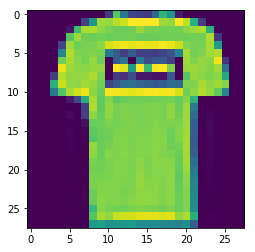

label: Ankle boot


In [57]:
# Display one of the images
i = 0
img = train_images[1, :, :]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[i]]}')


#### Fit the model

In [58]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=2, batch_size=256, verbose=2)

Train on 60000 samples
Epoch 1/2
60000/60000 - 54s - loss: 0.5781 - accuracy: 0.7963 - mae: 4.4200
Epoch 2/2
60000/60000 - 52s - loss: 0.3921 - accuracy: 0.8603 - mae: 4.4200


#### Plot training history

In [60]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()


,loss,accuracy,mae
0,0.578149,0.796267,4.420000
1,0.392089,0.860283,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

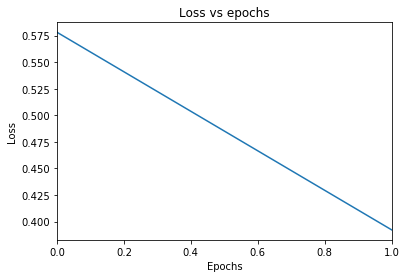

In [61]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title = "Loss vs epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")


[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'Epochs')]

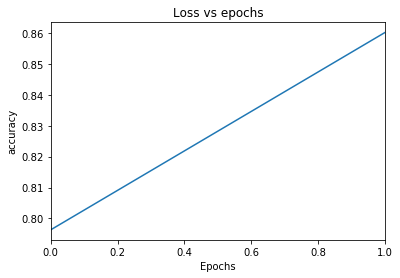

In [62]:
# Make a plot for the accuracy
loss_plot = df.plot(y="accuracy", title = "Loss vs epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="accuracy")


In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [66]:
# Evaluate the model
loss, accuracy, mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)


10000/1 - 5s - loss: 0.3039 - accuracy: 0.8662 - mae: 4.4200


#### Make predictions from the model

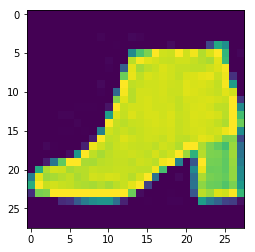

Label: Ankle boot


In [68]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [70]:
# Get the model predictions
pred = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Model prediction {labels[np.argmax(pred)]}")

Model prediction Ankle boot
